In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('EURUSD_Daily_Ask_2018.12.31_2019.10.05v2.csv')
df.to_csv('EURUSD.csv', decimal=".",sep=';', index=False)

In [131]:
from operator import index


def removeLine(value):
    toBeRemoved = df.Open[df.Open <= value ].index.tolist()
    print(toBeRemoved)
    test = df.drop(toBeRemoved)
    df['Time (UTC)'] = test['Time (UTC)']
    df['Open'] = test['Open']
    df['Close'] = test['Close']
    df['High'] = test['High']
    df['Low'] = test['Low']

def changeWithPrev(value):
    indexFinded = df.Open[df.Open <= value ].index.tolist()
    if indexFinded != 0:
        #df['Open'][indexFinded[0]] = df['Open'][indexFinded[0] - 1]
        #df.__getitem__('Open').__setitem__([107], df['Open'][indexFinded[0] - 1])
        df.loc[indexFinded[0], ['Open']] = df['Open'][indexFinded[0] - 1]

def changeWithInterpolation(value):
    indexFinded = df.Open[df.Open <= value ].index.tolist()
    # I know it's not interpolation, but it is
    # easier and interpolation is not really
    # necessary for a lab...
    if indexFinded != 0:
        print("Entrei")
        df.loc[indexFinded[0], ['Open']] = (df['Open'][indexFinded[0] - 1] + df['Open'][indexFinded[0] + 1])/2 

def outlierRemoveFig(outlier):
    plt.plot(df['Open'])

    plt.show()
    # bellow = input("Say the value to be eliminated")

    removeLine(outlier)
    #changeWithInterpolation(outlier)
    #changeWithPrev(outlier)
    
    plt.plot(df['Open'])
    plt.show()
    
def detectSamples(gain):
    detectedSamplesList = []
    average = df['Open'].mean()
    std = df['Open'].std()

    for value in df['Open']:
        if (value < (average - std*gain)) or (value > (average + std*gain)):
            detectedSamplesList.append(value)

    print(len(detectedSamplesList))
    print(detectedSamplesList)
    return detectedSamplesList

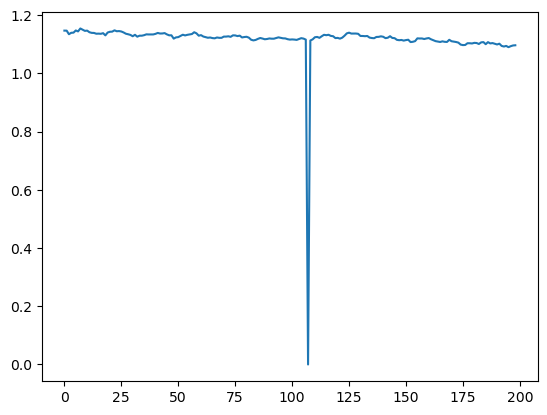

[107]


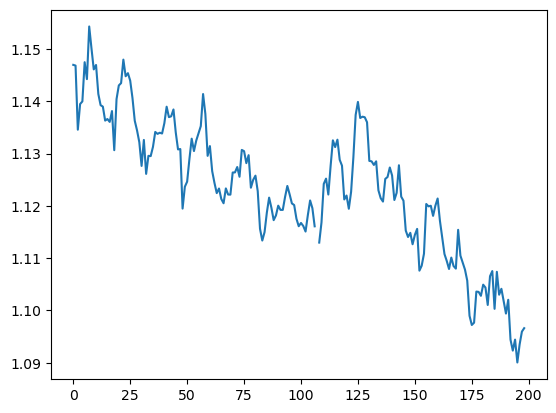

In [135]:
#detectSamples(1)
outlierRemoveFig(0)

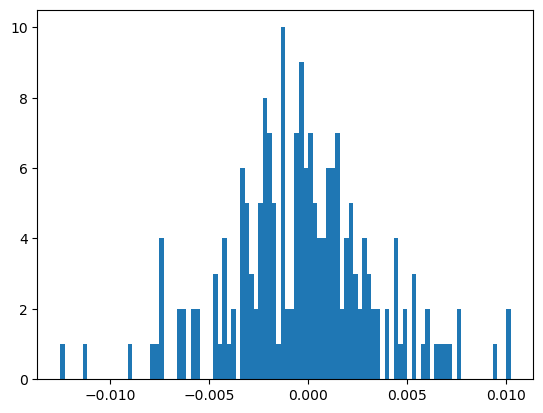

In [172]:
variation = []
for i in range(len(df['Close'])):
    if i == len(df['Close']) - 1:
        continue
    #if df['Close'][i+1] - df['Close'][i] < 0:
    #    variation.append(df['Close'][i] - df['Close'][i+ 1])
    #else:   
    variation.append(df['Close'][i+1] - df['Close'][i])
plt.hist(variation, bins=100)
plt.show()

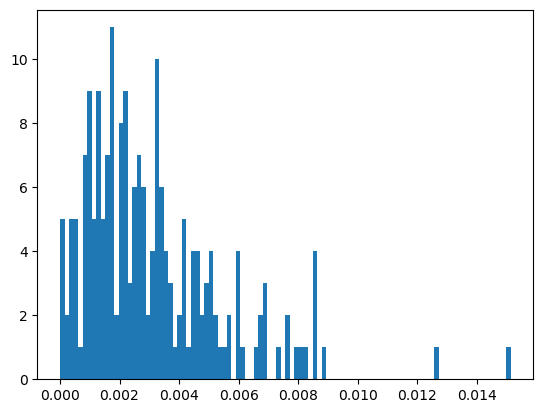

In [173]:
variationDay = []
for i in range(len(df['Close'])):
    if i == len(df['Close']) - 1:
        continue
    variationDay.append(df['High'][i] - df['Close'][i])
plt.hist(variationDay, bins=100)
plt.show()

/tmp/ipykernel_4344/3955376218.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  compare.append(variation[i]/ variationDay[i])


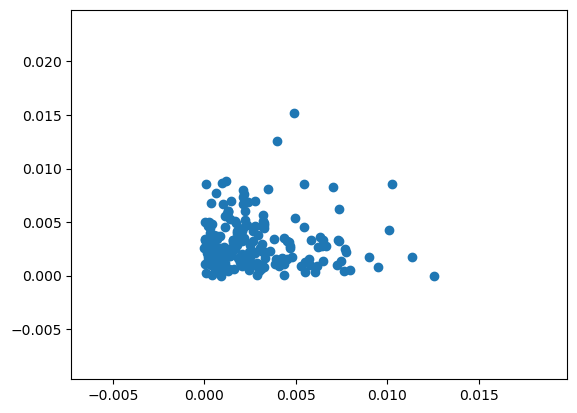

In [182]:
variation = []
for i in range(len(df['Close'])):
    if i == len(df['Close']) - 1:
        continue
    if df['Close'][i+1] - df['Close'][i] < 0:
        variation.append(df['Close'][i] - df['Close'][i+ 1])
    else:   
        variation.append(df['Close'][i+1] - df['Close'][i])


compare = []
for i in range(len(variationDay)):
    if i == len(variationDay) - 1:
        continue
    compare.append(variation[i]/ variationDay[i])


plt.scatter(variation, variationDay)
plt.show()
# with this, it is possible to see, that if the variation
# on the day is linearly depended with the variation between days

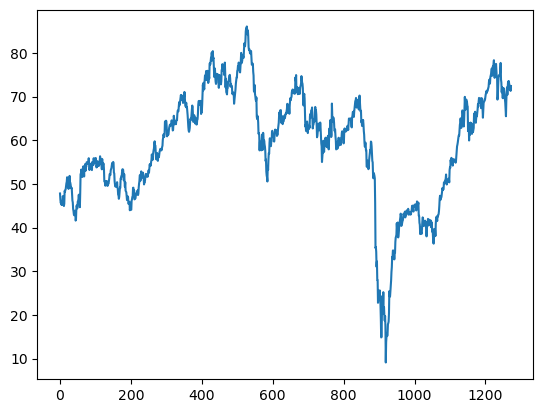

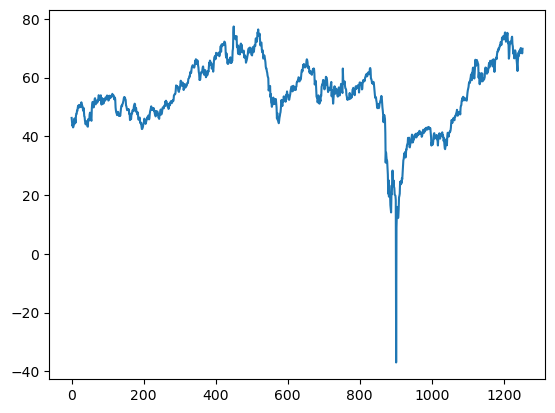

In [139]:
# Scatter Plot things
df_brenteu = pd.read_csv('DCOILBRENTEUv2.csv')
#df_brenteu.to_csv('DCOILBRENTEUv3.csv', decimal=".",sep=',', index=False)

df_texas = pd.read_csv('DCOILWTICOv2.csv')
#df_texas.to_csv('DCOILWTICOv3.csv', decimal=".",sep=',', index=False)

plt.plot(df_brenteu['DCOILBRENTEU'])

plt.show()

plt.plot(df_texas['DCOILWTICO'])

plt.show()


1253


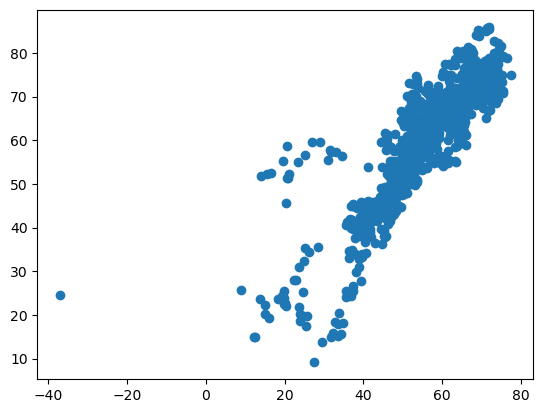

In [146]:
# STILL NEED TO DO THE CLEANING I GUESS
newDF_brenteu = df_brenteu['DCOILBRENTEU'][0:1253]
newDF_Texas = df_texas['DCOILWTICO'][0:1254]
print(len(newDF_Texas))
plt.scatter(newDF_Texas, newDF_brenteu)

plt.show()